In [1]:
from cluster_common import *

Welcome to JupyROOT 6.12/04


In [8]:
max_events = 100
max_parts = 1
max_layers = 28

In [9]:
fname = "/Users/artur/cernbox/HGCAL/cluster/ntuples/hgcalNtuple_gamma25_newDefault_n9000.root"
hit_type = 'rechit'

In [10]:
array = get_event_array(fname, hit_type = hit_type, max_events = max_events)

## Reading data from tree
## Done reading


################################################################################
Reading data from tree
Plotting
1


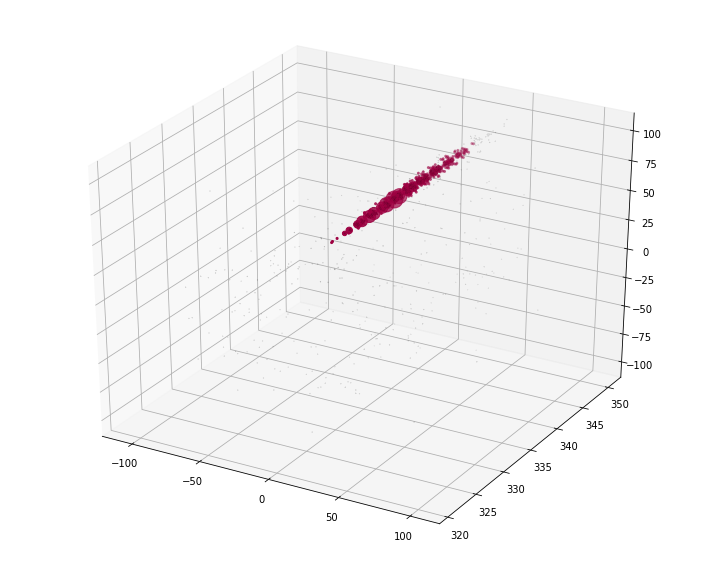

In [11]:
    n_parts = 0

    pca_widths = []
    '''
    fig = plt.figure(figsize=(10, 8))
    ax = plt.subplot(projection = '3d')
    '''

    part_clust_data = []

    hits = np.zeros((1,3))
    enes = np.zeros((1))

    print 80*"#"
    print("Reading data from tree")
    for event in array:

        if n_parts >= max_parts: break

        particles = get_genparticles(event)

        if len(particles) < 1: continue

        n_parts += len(particles)

        ### HITS
        hits_xyz, hits_energies = get_hits(event, hit_type = hit_type, max_layer = max_layers)

        #hits = hits_xyz
        #enes = hits_energies

        #hits.append(hits_xyz)
        #enes.append(hits_energies)
        hits = np.concatenate((hits, hits_xyz))
        enes = np.concatenate((enes, hits_energies))

    # fixing hack
    hits = np.delete(hits, (0), axis = 0)
    enes = np.delete(enes, (0), axis = 0)

    print('Plotting')
    print n_parts

    #ax.scatter(hits[:, 1], hits[:, 0], hits[:,2], s = 0.01, c = 'black')#enes*100)

    if True:

        ## CLUSTER
        #clusters = my_cluster(hits_xyz, hits_energies)
        clusters = my_cluster(hits, enes)

        if clusters:
            part_clust_data.append((particles,clusters))
        #else: continue

        fig = plt.figure(figsize=(10, 8))
        ax = plt.subplot(projection = '3d')

        ax.scatter(hits[:, 1], hits[:, 0], hits[:,2], s = 0.01, c = 'black')#enes*100)

        colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(clusters))]

        for cluster, col in zip(clusters, colors):
            if cluster.pca:
                #print cluster.energy
                pcaw = cluster.pca.explained_variance_
                pcaw /= np.sum(cluster.pca.explained_variance_)
                pca_widths.append(pcaw)
            ## print hits of cluster
            ax.scatter(cluster.hits[:, 1], cluster.hits[:, 0], cluster.hits[:,2], s = cluster.energies*50, c = col)

            # plot outliers
            ax.scatter(cluster.outliers[:, 1], cluster.outliers[:, 0], cluster.outliers[:,2], s = 5, c = col, marker = 'h')

        fig.tight_layout()
        plt.show()